#### Behavioral Customer Segmentation - RFM Analysis

Behavioral customer segmentation, particularly RFM (Recency, Frequency, and Monetary Value) analysis, is a critical method for understanding customer behavior by evaluating purchase patterns. The RFM model segments customers based on three key metrics:

    Recency: This measures how recently a customer has made a purchase. A shorter period since the last purchase indicates higher engagement and customer loyalty.

    Frequency: This metric assesses the number of purchases made within a specific timeframe, typically over the last 12 months. Higher frequency is an indicator of customer satisfaction and repeat business.

    Monetary Value: This represents the total spending of a customer over a set period, often the last 12 months. It helps in identifying the most financially valuable customers.

Approaches to Grouping RFM Values:

RFM values can be categorized using various methods, each offering unique insights:

    Quantile-Based Segmentation: Customers are divided into groups of equal size based on percentile values for each RFM metric. This approach is useful for identifying top-performing segments across different behavioral dimensions.

    Pareto 80/20 Approach: Assigns customers to either a high or low-value group based on the Pareto principle, which often reveals that a large proportion of revenue comes from a relatively small fraction of customers.

    Custom Segmentation Based on Business Knowledge: Tailoring segmentation criteria to align with specific business objectives or industry standards. This method allows for a more nuanced understanding of customer behavior relevant to the business context.

Process of Calculating Percentiles:

    Sorting: Organize customers in ascending or descending order based on the chosen metric.

    Grouping: Divide the sorted customer list into a pre-defined number of groups, ensuring each group has an equal number of customers.

    Labeling: Assign labels to each group. The labeling criteria can vary; for instance, in Recency, lower values (more recent activity) are more favorable, so the labeling is inverse - the most recent purchases receive the highest scores.

The dataset in question was originally sourced from the UCI Machine Learning Repository, a well-regarded repository for machine learning datasets. It encompasses over 500,000 transactions recorded from a UK-based online retail store. For our analysis, we have utilized a subset, constituting 20% of this extensive dataset, which is conveniently accessible for download at the provided link.
    https://github.com/Samrandd/Portfolio/blob/master/Project_09/online.csv



In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
online=pd.read_csv("online.csv")
online.head(2)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom


In [3]:
#remove unnamed columns
online=online.loc[:,~online.columns.str.contains("^Unnamed")]
online.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [4]:
#Let's get the total sum of the purchase
online['TotalSum']=online["Quantity"]*online["UnitPrice"]
online.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,17.85


In [5]:
#let's start with proprocessing the online dataframe with only the latest 12 months of data 
print('Min:{};Max:{}'.format(min(online.InvoiceDate),max(online.InvoiceDate)))

Min:2010-12-01 08:26:00;Max:2011-12-09 12:49:00


Let's create a hypothetical snapshot_day data as if we're doing analysis recently. class datetime.timedelta: A duration expressing the difference between two date, time, or datetime instances to microsecond resolution

In [6]:
#this is the only correct way to create a hypothetical snapshot_day data as if we are doing snalysis recently
import datetime
from datetime import timedelta
date_1=datetime.datetime.strptime(max(online.InvoiceDate),'%Y-%m-%d %H:%M:%S')
day_add=datetime.timedelta(days=1)
#create a snapshot date
snapshot_date=date_1+day_add #the last day+one dat after
print(snapshot_date,date_1,day_add)

2011-12-10 12:49:00 2011-12-09 12:49:00 1 day, 0:00:00


In [7]:
snapshot_date=datetime.date(snapshot_date.year,snapshot_date.month,snapshot_date.day)
print(snapshot_date)

2011-12-10


In [8]:
online['InvoiceDate']=pd.to_datetime(online['InvoiceDate'],format='%Y-%m-%d %H:%M:%S')
#Define a function that parses the date
def get_day(x):return datetime.datetime(x.year,x.month,x.day)

In [9]:
#create Invoice day column 
online['InvoiceDay']=online['InvoiceDate'].apply(get_day)

In [10]:
#Group by CustomerID and select the Invoiceday value
group_customer_invoice=online.groupby('CustomerID')['InvoiceDay']

In [11]:
#Assign a max InvoiceDay value to the dataset to find the difference with the recent transaction
online['Cohortmax']=group_customer_invoice.transform('max')
#print(online['InvoiceDate'],online['Cohortmax'])

In [12]:
#Get the integers for date parts from the 'invoiceday' column
snapshot_year=snapshot_date.year
snapshot_month=snapshot_date.month
snapshot_day=snapshot_date.day
print(snapshot_year,snapshot_month,snapshot_day)

2011 12 10


Let's create a function that creates date parts to return invoice parts

In [13]:
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year, month, day
# Get the integers for date parts from the `Cohortmax` column
invoice_year,invoice_month,invoice_day=get_date_int(online,'Cohortmax')

In [14]:
#calculate diff in years
years_dif=snapshot_year-invoice_year
#calcualate diff in months
months_dif=snapshot_month-invoice_month
#calculate diff in days
days_dif=snapshot_day-invoice_day

#extract the diff in days form all previous values-measurement of dates can be different
online['Invoicedif']=years_dif*365 + months_dif*30+days_dif

To build a dataset with recency, frequency, and monetary values

In [15]:
#Aggregate data on a  customer level
data_agg=online.groupby(['CustomerID']).agg({
    'Invoicedif':'max', #lambda x: int((snapshot_date - x.max()).days)
    'InvoiceNo':'count',
    'TotalSum':'sum'
})

#Rename columns for easier description
data_agg.rename(columns={
    'Invoicedif':'Recency',
    'InvoiceNo':'Frequency',
    'TotalSum':'MonetaryValue'},inplace=True)
#Let'find the top valued customers
data_agg.sort_values(by='MonetaryValue',ascending=False).head(5)


,Recency,Frequency,MonetaryValue
CustomerID,,,
18102,2,82,59596.07
17450,11,64,36160.84
17511,3,193,18227.48
16029,44,30,15560.51
16684,5,57,14708.96


We need to assign a quartile to each segment and Recent customers should be called active.

In [16]:
data_agg_rfm=data_agg.copy()

#### Labeling customers based on their RFM

In [17]:
# Create labels for Recency
r_labels=range(3,0,-1) #the smaller the number of recency the better
#create labels for frequency
f_labels=range(1,4) #the higher the number of transaction the better
#create labels for monetary value
m_labels=range(1,4) #the higher the number of monetary value, the better

In [18]:
r_groups=pd.qcut(data_agg_rfm['Recency'],3,labels=r_labels)
f_groups=pd.qcut(data_agg_rfm['Frequency'],3,labels=f_labels)
m_groups=pd.qcut(data_agg_rfm['MonetaryValue'],3,labels=m_labels)

In [19]:
data_agg=data_agg.assign(R=r_groups.values,F=f_groups.values,M=m_groups.values)

In [20]:
#Calculate RFM Score
data_agg['RFM_Score']=data_agg[['R','F','M']].sum(axis=1)
print(data_agg['RFM_Score'].head())

CustomerID
12747    9
12748    9
12749    9
12820    9
12822    6
Name: RFM_Score, dtype: int64


In [21]:
data_agg.head(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12747,3,27,992.82,3,3,3,9
12748,1,967,7522.06,3,3,3,9
12749,4,37,813.45,3,3,3,9
12820,4,17,268.02,3,3,3,9
12822,70,9,146.15,2,2,2,6


In [22]:
#To find the mean of Recency, Frequency and Monetary value per RFM score
data_agg.groupby('RFM_Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           231.2       2.5          36.3   526
4           137.6       4.1          65.3   528
5           116.2       6.7         151.0   597
6            68.2      10.7         178.9   521
7            51.6      16.0         303.6   495
8            33.0      29.6         558.8   468
9            10.8      63.7        1342.1   566

In [23]:
#To create a custom segmentation based on RFM_Score values
def rfm_stage(df):
    if df['RFM_Score']>=9:
        return 'Gold'
    elif ((df['RFM_Score']>=5) and (df['RFM_Score']<9)):
        return 'Silver'
    else:
        return 'Bronze'


In [24]:
# Create a new variable RFM_Level
data_agg['RFM_Stage']=data_agg.apply(rfm_stage,axis=1)

In [25]:
# Print the header with top 5 rows to the console
print(data_agg.head(5))

            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Stage
CustomerID                                                                 
12747             3         27         992.82  3  3  3          9      Gold
12748             1        967        7522.06  3  3  3          9      Gold
12749             4         37         813.45  3  3  3          9      Gold
12820             4         17         268.02  3  3  3          9      Gold
12822            70          9         146.15  2  2  2          6    Silver


a custom segment was made based on RFM Score!

In [26]:
data_agg.loc[data_agg.RFM_Stage=='Gold'].count()

Recency          566
Frequency        566
MonetaryValue    566
R                566
F                566
M                566
RFM_Score        566
RFM_Stage        566
dtype: int64

A bar graph depicting the number of customers in each RFM category illustrated that the majority fell into the 'Silver' category.

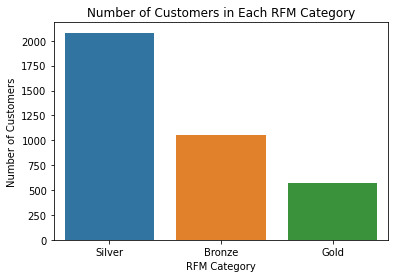

In [56]:
# Count the number of customers in each RFM Stage
rfm_counts = data_agg['RFM_Stage'].value_counts()

# Create a bar plot
sns.barplot(x=rfm_counts.index, y=rfm_counts.values)

# Adding the aesthetics
plt.title('Number of Customers in Each RFM Category')
plt.xlabel('RFM Category')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

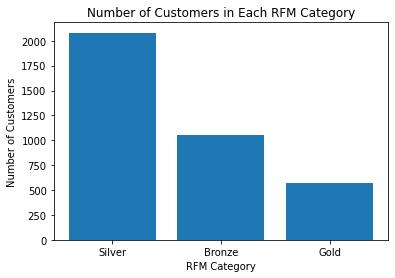

In [64]:
#usingn matplotlib
plt.bar(rfm_counts.index,rfm_counts.values)
# Adding the aesthetics
plt.title('Number of Customers in Each RFM Category')
plt.xlabel('RFM Category')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()

In [27]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg=data_agg.groupby('RFM_Stage').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count'] #return the size of each segment
}).round(1)
#print the aggreagted dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Stage                                      
Bronze      184.3       3.3          50.8  1054
Gold         10.8      63.7        1342.1   566
Silver       70.1      15.1         286.0  2081


The top-rated customers have a higher rate of transaction and purchase more and the recency rate for top-rated purchasers is high

In [28]:
rfm_level_agg.describe()

Recency  Frequency MonetaryValue             
            mean       mean          mean        count
count    3.00000   3.000000      3.000000     3.000000
mean    88.40000  27.366667    559.633333  1233.666667
std     88.18577  32.013955    687.764730   773.315158
min     10.80000   3.300000     50.800000   566.000000
25%     40.45000   9.200000    168.400000   810.000000
50%     70.10000  15.100000    286.000000  1054.000000
75%    127.20000  39.400000    814.050000  1567.500000
max    184.30000  63.700000   1342.100000  2081.000000

K_means clustering
Key steps:
    * Data pre-processing
    * Choosing a number of clusters
    * Running k-means clustering on pre-processed data
    * Analyzing average RFM values of each cluster

#### Data pre_processing

k_means assumptions :
1. symmetric distribution of variables 
2. all variables have same average values- this means all variables receive the same weight in k_mean calculations 
3. variables with same variance- same std

Skeweness can be removed by using logarithmatic transformation- distribution
log transformation work with positive values

In [29]:
data_agg_rfm.describe()

,Recency,Frequency,MonetaryValue
count,3701.000000,3701.000000,3701.000000
mean,93.566333,19.147257,380.535069
std,98.778916,44.831615,1474.285937
min,1.000000,1.000000,0.650000
25%,19.000000,4.000000,59.400000
50%,52.000000,9.000000,140.300000
75%,149.000000,21.000000,337.800000
max,374.000000,1532.000000,59596.070000


The averages and standard deviations are different across the variables

#### Identifying skeweness

C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

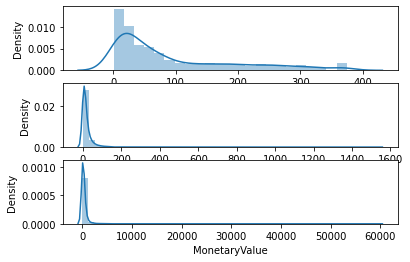

In [30]:
#The plt.subplot(...)  function call allows you to plot several subplots in one chart,
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Plot distribution of var1
plt.subplot(3,1,1)
sns.distplot(data_agg_rfm['Recency'])

#Plot distribution of var2
plt.subplot(3,1,2)
sns.distplot(data_agg_rfm['Frequency'])

#plot distributio of var3
plt.subplot(3,1,3)
sns.distplot(data_agg_rfm['MonetaryValue'])

# Show the plot
plt.show()


None of the variables are normally distributed. 
Here we need to follow the steps below:

* 1.Unskew the data - log transformation
* 2.Standardize to the same average values
* 3.Scale to the same standard deviation
* 4.Store as a separate array to be used for clustering

C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

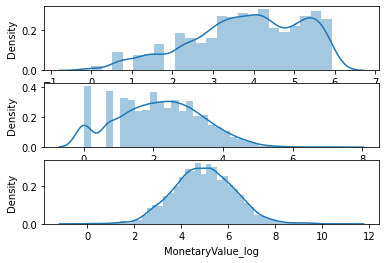

In [31]:
#data_rfm1= data_agg_rfm.copy()
data_rfm1=pd.DataFrame()

# Apply log transformation to Recency
data_rfm1['Recency_log'] = np.log(data_agg_rfm['Recency'])

# Apply log transformation to Frequency
data_rfm1['Frequency_log'] = np.log(data_agg_rfm['Frequency'])
# Apply log transformation to MonetaryValue
data_rfm1['MonetaryValue_log'] = np.log(data_agg_rfm['MonetaryValue'])

# Create a subplot of the distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(data_rfm1['Recency_log'])

# Create a subplot of the distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(data_rfm1['Frequency_log'])
# Create a subplot of the distribution of MonetaryValue
plt.subplot(3, 1, 3); sns.distplot(data_rfm1['MonetaryValue_log'])
# Show the plot
plt.show()

The skewness was improved with just applying the log transformation!the only issue is log works with Positive Data

#### Centering variables with different means

K_means works well on variables with the same mean Centering variables is done by substracting average value from each observation

Combining centering and scaling Two options 
* 1. Combining mean and dividing by standard deviation manually 
* 2. Use a scaler from scikit_learn library (return numpy.ndarray object). 
We use the both options

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data_rfm1)
data_normalized=scaler.transform(data_rfm1)

In [33]:
# Create a pandas DataFrame
data_normalized=pd.DataFrame(data_normalized,index=data_agg_rfm.index,columns=data_agg_rfm.columns)
print(data_normalized.describe().round(2))

       Recency  Frequency  MonetaryValue
count  3701.00    3701.00        3701.00
mean      0.00       0.00           0.00
std       1.00       1.00           1.00
min      -2.81      -1.79          -4.09
25%      -0.65      -0.66          -0.66
50%       0.09       0.01          -0.00
75%       0.86       0.70           0.66
max       1.54       4.22           4.60


In [54]:
print('mean:\n ', data_normalized.mean(axis=0).round(2),'\n')
print('std:\n ', data_normalized.std(axis=0).round(2))

mean:
  Recency          0.00
Frequency        0.00
MonetaryValue    0.00
Cluster          0.54
dtype: float64 

std:
  Recency          1.0
Frequency        1.0
MonetaryValue    1.0
Cluster          0.5
dtype: float64


C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\samra\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

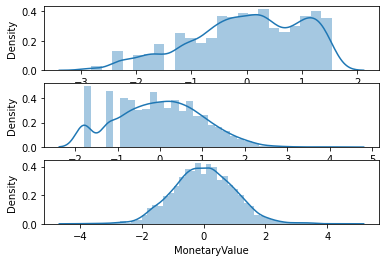

In [35]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_normalized['MonetaryValue'])

# Show the plot
plt.show()

You can see how the skewness is managed after applying these transformations!

Implementation of k-means clustering

Common methods to define the number of clusters
    * Visual methods-elbow criterion
    * Mathematical methods-silouette coefficient
    * Experimentation and interpretation

#### Visual Method Visual Method 

This method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and looking for the 'elbow point' where the rate of decrease sharply changes. Elbow criterion method Plot the number of clusters against within-cluster sum-of-squared-errors (SSE) - the sum of squared distances from every data point to their cluster center. Identify an "elbow" in the plot which is a point representing an "optimal" number of clusters.
For instance, if the WCSS graph shows a steep decline until 4 clusters and then plateaus, it suggests that increasing the number of clusters beyond 4 does not significantly improve the model.

In [36]:
# Import key libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Fit KMeans and calculate SSE for each *k*
sse={}
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k]=kmeans.inertia_ # sum of squared distances to closest cluster center

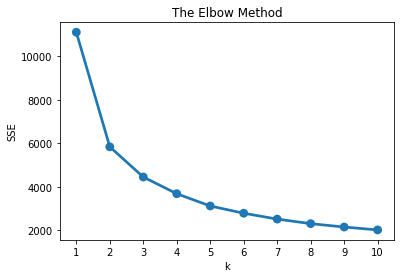

In [37]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
# Add X-axis label "k"
plt.xlabel('k'); 
# Add y-axis label "k"
plt.ylabel('SSE')
# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()
#Best to choose the point on elbow , or the next point
#Use as a guide but test multiple solutions

### Silhouette score

In [38]:
from sklearn.metrics import silhouette_score

range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds=clusterer.fit_predict(data_normalized)
    centers = clusterer.cluster_centers_
    score = silhouette_score (data_normalized, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.38958259846518933)
For n_clusters = 3, silhouette score is 0.30437540697727117)
For n_clusters = 4, silhouette score is 0.2966763038216675)
For n_clusters = 5, silhouette score is 0.2815639216964168)
For n_clusters = 6, silhouette score is 0.2777409113459039)
For n_clusters = 7, silhouette score is 0.26514111570216153)
For n_clusters = 8, silhouette score is 0.26251099300296626)
For n_clusters = 9, silhouette score is 0.2671911364762085)


#### Experimentation

Build clustering at and around elbow solution Analyze their properties - average RFM values Compare against each other and choose one which makes most business sense

### Choosing the Number of Clusters

In [39]:
#Import KMeans from sklearn library and initialize it as kmeans
kmeans2=KMeans(n_clusters=2,random_state=1)
kmeans2.fit(data_normalized)
cluster_labels_2=kmeans2.labels_
data_agg_rfm_k2=data_agg_rfm.assign(Cluster=cluster_labels_2)
data_agg_rfm_k2.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          34.0      35.0         719.0  1708
1         145.0       5.0          91.0  1993

In [40]:
#Import KMeans from sklearn library and initialize it as kmeans
kmeans3=KMeans(n_clusters=3,random_state=1)
kmeans3.fit(data_normalized)
cluster_labels_3=kmeans3.labels_
data_agg_rfm_k3=data_agg_rfm.assign(Cluster=cluster_labels_3)
data_agg_rfm_k3.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          78.0      13.0         225.0  1598
1         171.0       3.0          55.0  1213
2          15.0      52.0        1103.0   890

Profile and interpret segments
Approaches to build customer personas
  1. Summary statistics for each cluster e.g.average RFM values
  2. Snake plots(from market research)
  3. Relative importance of cluster attributes compared to population

#### Summary statistics for each cluster e.g.average RFM values
 compare the result of 2 and 3 clusters above 

#### Snake plots to understand and compare segments
    Market research technique to compare different segments
    1. Visual representation of each segment's attributes
    2. Need to first normalize data (center & scale)
    3. Plot each cluster's average normalized values of each attribute

#### Prepare data with two clusters for a snake plot 

In [41]:
#Transform datamart_normalized as DataFrame and add a Cluster column
data_normalized_two_clusters = pd.DataFrame(data_normalized, 
                                   index=data_agg_rfm.index, 
                                   columns=data_agg_rfm.columns)
data_normalized_two_clusters['Cluster'] = data_agg_rfm_k2['Cluster']
data_normalized_two_clusters.head(3)

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.006834,0.909521,1.482882,0
12748,-2.813936,3.845050,3.022433,0
12749,-1.795486,1.168000,1.331390,0


In [42]:
#Melt the data into a long format so RFM values and metric names are stored in 1 column each
data_melt_two_clusters = pd.melt(data_normalized_two_clusters.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Attribute', 
                    value_name='Value')
data_melt_two_clusters.head(5)

,CustomerID,Cluster,Attribute,Value
0,12747,0,Recency,-2.006834
1,12748,0,Recency,-2.813936
2,12749,0,Recency,-1.795486
3,12820,0,Recency,-1.795486
4,12822,1,Recency,0.307248


<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

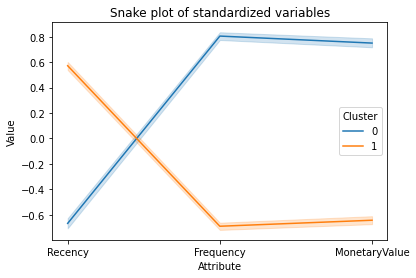

In [43]:
#Visulaize a snake plot
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt_two_clusters)

#### Prepare three cluster data for a snake plot

In [44]:
#Transform datamart_normalized as DataFrame and add a Cluster column
data_normalized_three_clusters = pd.DataFrame(data_normalized, 
                                   index=data_agg_rfm.index, 
                                   columns=data_agg_rfm.columns)
data_normalized_three_clusters['Cluster'] = data_agg_rfm_k3['Cluster']

In [45]:
data_normalized_three_clusters.head(3)

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12747,-2.006834,0.909521,1.482882,2
12748,-2.813936,3.845050,3.022433,2
12749,-1.795486,1.168000,1.331390,2


In [47]:
#Melt the data into a long format so RFM values and metric names are stored in 1 column each
data_melt_three_clusters = pd.melt(data_normalized_three_clusters.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                    var_name='Attribute', 
                    value_name='Value')
data_melt_three_clusters.head(5)

,CustomerID,Cluster,Attribute,Value
0,12747,2,Recency,-2.006834
1,12748,2,Recency,-2.813936
2,12749,2,Recency,-1.795486
3,12820,2,Recency,-1.795486
4,12822,0,Recency,0.307248


<AxesSubplot:title={'center':'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

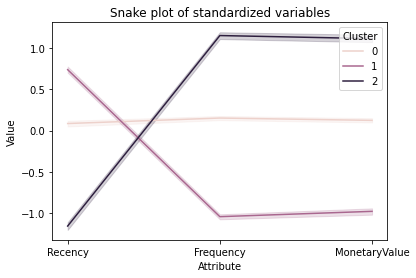

In [48]:
#Visulaize a snake plot
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=data_melt_three_clusters)

#### Relative importance of cluster attributes compared to population
  * It's a useful technique to identify relative importance of each segment's attribute
  * Calculate average values of each cluster

In [49]:
#calculate avergae values of each cluster
cluster_avg = data_agg_rfm_k3.groupby(['Cluster']).mean()

In [50]:
#calculate average values of population
population_avg=data_agg_rfm.mean()

In [51]:
#calculate importanc escore by dividing them and substracting 1(ensures 0 is returned when cluster average equals population average)
relative_imp=cluster_avg/population_avg-1
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.17,-0.32,-0.41
1,0.83,-0.84,-0.86
2,-0.84,1.71,1.90


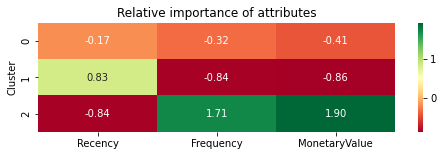

In [52]:
#Plot a heatmap for easier interpretation:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


The further a ratio is from 0, the more important that attribute is for a segment relative to the total

         Recency  Frequency  MonetaryValue
Cluster                                   
0          -0.64       0.85           0.89
1           0.55      -0.73          -0.76


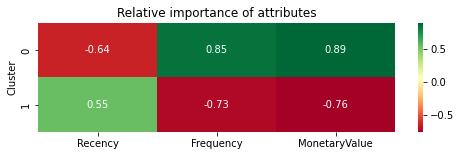

In [53]:
#calculate avergae values of each cluster
cluster_avg = data_agg_rfm_k2.groupby(['Cluster']).mean()
#calculate average values of population
population_avg=data_agg_rfm.mean()
#calculate importanc escore by dividing them and substracting 1(ensures 0 is returned when cluster average equals population average)
relative_imp=cluster_avg/population_avg-1
print(relative_imp.round(2))
#Plot a heatmap for easier interpretation:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

#### Key steps of the segmentation project
* Gather data - updated data with an additional variable
* Pre-process the data
* Explore the data and decide on the number of clusters
* Run k-means clustering
* Analyze and visualize results

Reference: Segmentaion by Karolis Urbonis at Datamap
    